In [16]:
import ptc_twiss.madx_configuration as twiss_conf
import ptc_twiss.matrix_indexes as twiss_indexes
import ptc_twiss.optics_parameters as twiss_optics_parameters
import ptc_twiss.particles_trajectory_generator as twiss_ptg
import ptc_track.madx_configuration as track_conf
import ptc_track.matrix_indexes as track_indexes
import ptc_track.optics_parameters as track_optics_parameters
import ptc_track.particles_trajectory_generator as track_ptg
import visualization.optics_parameter_visualisation as plotter
import approximator.runner as app_runner
import approximator.optics_parameters as app_op
import approximator.matrix_indexes as app_indexes
import approximator.particles_trajectory_generator as app_ptg
import data.bunch_configuration as buc
import os
import matplotlib.pyplot as plt
import seaborn as sns
import comparators.transport as transport
import models.train_model as tram
import models.approximator as stub_app
import matplotlib.pyplot as plt

In [17]:
sns.set_style("whitegrid")

In [18]:
path_to_project = "/home/rafalmucha/Pobrane/optic"
folder_name = "2017_matched"
script_file_name = "inputmadx_matched.madx"
xml_file_name = "configuration_reco_beam1_test.xml"

In [19]:
path_to_script = os.path.join(path_to_project, folder_name, script_file_name)
s = 219.55
twiss_configuration = twiss_conf.TwissConfiguration(path_to_script, s)

In [20]:
path_to_configuration = os.path.join(path_to_project, folder_name)
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 0
track_configuration = track_conf.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [21]:
parametrisation_file_name = "parametrization_6500GeV_0p4_185_reco_test_fet.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"
path_to_file = os.path.join(path_to_project, folder_name, parametrisation_file_name)
source_folder_name = "optics_generator_python"
path_to_sources = os.path.join(path_to_project, source_folder_name)
approximator_fet = app_runner.get_approximator(path_to_sources, path_to_file, approximator_name)

In [22]:
parametrisation_file_name = "parametrization_6500GeV_0p4_185_reco_test_fit.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"
path_to_file = os.path.join(path_to_project, folder_name, parametrisation_file_name)
source_folder_name = "optics_generator_python"
path_to_sources = os.path.join(path_to_project, source_folder_name)
approximator_fit = app_runner.get_approximator(path_to_sources, path_to_file, approximator_name)

In [23]:
parametrisation_file_name = "parametrization_6500GeV_0p4_185_reco_test_old.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"
path_to_file = os.path.join(path_to_project, folder_name, parametrisation_file_name)
source_folder_name = "optics_generator_python"
path_to_sources = os.path.join(path_to_project, source_folder_name)
approximator_old = app_runner.get_approximator(path_to_sources, path_to_file, approximator_name)

In [24]:
# Parameters of training
x_mean = 0.0
sigma_x = 4e-3
theta_x_mean = 0.000
sigma_theta_x = 1.3e-3
y_mean = 0.0
sigma_y = 4e-3
theta_y_mean = 0.00
sigma_theta_y = 1.3e-3
pt_mean = -0.15
sigma_pt = 0.2

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 12000

bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, number_of_x_values,
                                                        theta_x_mean, sigma_theta_x, number_of_theta_x_values,
                                                        y_mean, sigma_y, number_of_y_values,
                                                        theta_y_mean, sigma_theta_y, number_of_theta_y_values,
                                                        pt_mean, sigma_pt, number_of_pt_values)

path_to_optics = os.path.join(path_to_project, folder_name)
# prototype_approximator = tram.train_from_xml_configuration(path_to_configuration, path_to_xml_file, 0, path_to_sources)

In [25]:
title_sufix = r"2017 matched, $\xi=0$, set delta p and XA"
transporter1 = "ptc_twiss"
transporter2 = "ptc_track"
transporter3 = "app_fet"
transporter4 = "app_fit"
transporter5 = "app_old"
transporter6 = "app_160"
transporter7 = "prototype_total"

In [42]:
x_mean = 0.0
sigma_x = 4e-3
theta_x_mean = 0.000
sigma_theta_x = 1.3e-3
y_mean = 0.0
sigma_y = 4e-3
theta_y_mean = 0.00
sigma_theta_y = 1.3e-3
pt_mean = -0.15
sigma_pt = 0.15

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 12000

bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, number_of_x_values,
                                                        theta_x_mean, sigma_theta_x, number_of_theta_x_values,
                                                        y_mean, sigma_y, number_of_y_values,
                                                        theta_y_mean, sigma_theta_y, number_of_theta_y_values,
                                                        pt_mean, sigma_pt, number_of_pt_values)

In [58]:
transporters = {
#     transporter1: (twiss_ptg.transport, twiss_configuration, twiss_indexes.ptc_twiss),
    transporter2: (track_ptg.transport, track_configuration, track_indexes.ptc_track),
    transporter3: (app_ptg.transport, approximator_fet, app_indexes.indexes),
#     transporter4: (app_ptg.transport, approximator_fit, app_indexes.indexes),
#     transporter5: (app_ptg.transport, approximator_old, app_indexes.indexes),
#     transporter6: (app_ptg.transport, approximator_160, app_indexes.indexes)
#     transporter7: (app_ptg.transport, prototype_approximator, app_indexes.indexes)
}

(-15, 15)

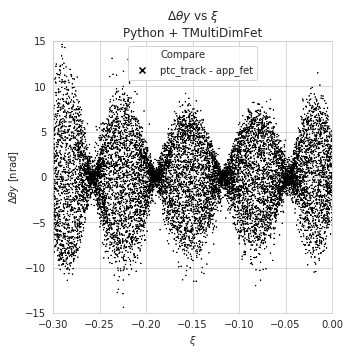

In [59]:
fig = plt.gcf()
fig.set_size_inches(5, 5)

axes = transport.compare(bunch_configuration, transporters, "theta y", "pt", title_sufix=r"Python + TMultiDimFet", plot_function=sns.scatterplot) #scatterplot don't work!!!
axes.set_ylim(-15, 15)

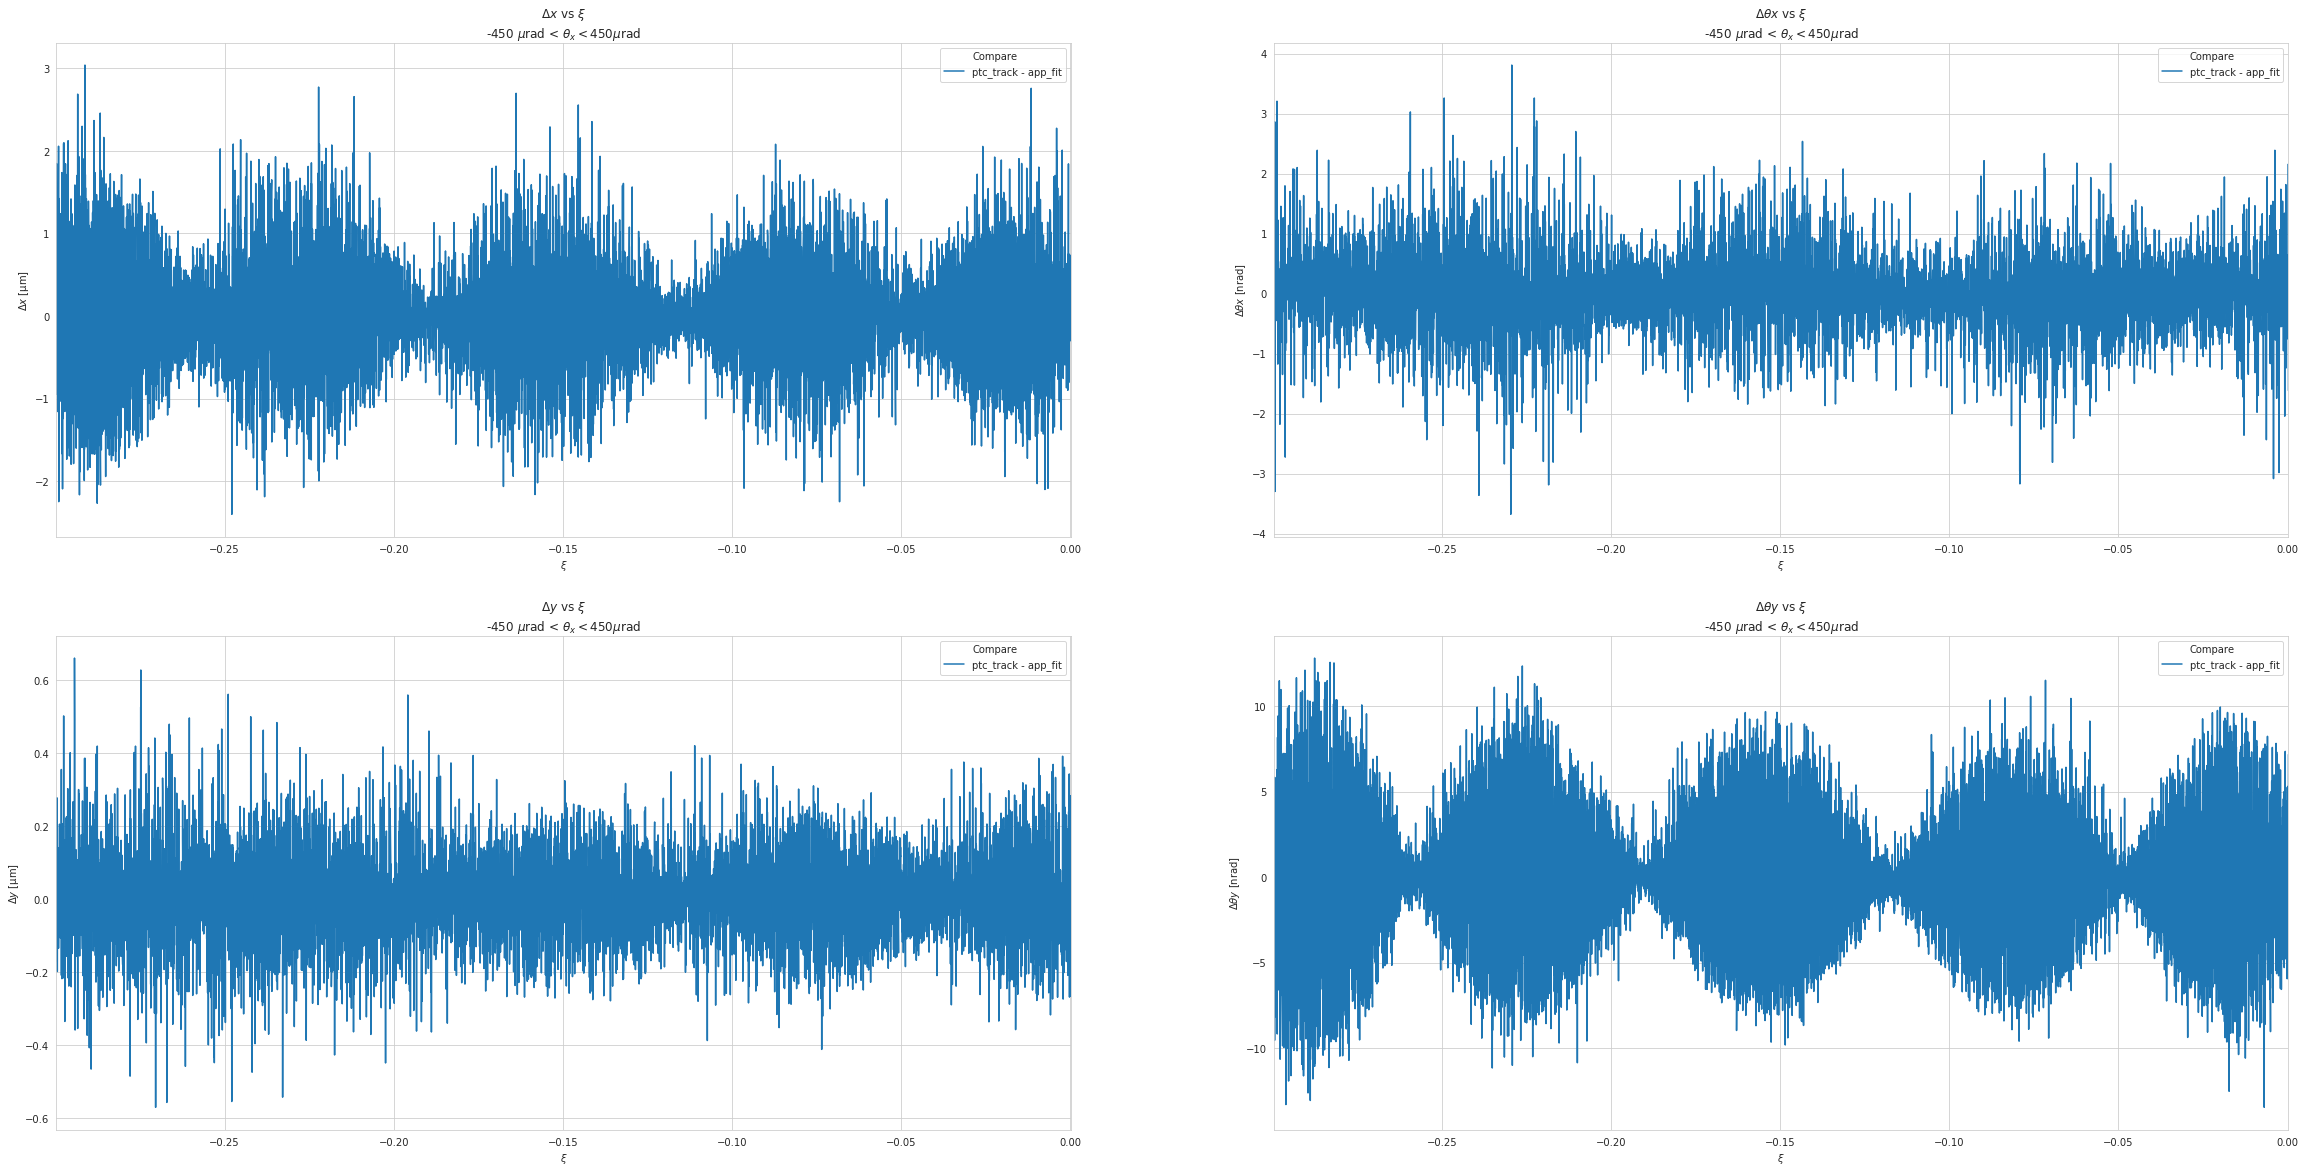

In [29]:
f, axes = plt.subplots(2, 2)

fig = plt.gcf()
fig.set_size_inches(40,20)

title_sufix = r"-450 $\mu$rad < $\theta_x < 450 \mu$rad"

transport.compare(bunch_configuration, transporters, "x", "pt", title_sufix=title_sufix, plot_axes=axes, plot_x_pos=0, plot_y_pos=0) #scatterplot don't work!!!
transport.compare(bunch_configuration, transporters, "theta x", "pt", title_sufix=title_sufix, plot_axes=axes, plot_x_pos=0, plot_y_pos=1) #scatterplot don't work!!!
transport.compare(bunch_configuration, transporters, "y", "pt", title_sufix=title_sufix, plot_axes=axes, plot_x_pos=1, plot_y_pos=0) #scatterplot don't work!!!
transport.compare(bunch_configuration, transporters, "theta y", "pt", title_sufix=title_sufix, plot_axes=axes, plot_x_pos=1, plot_y_pos=1) #scatterplot don't work!!!

AttributeError: Unknown property s

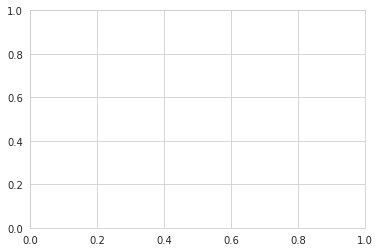

In [30]:
transport.compare(bunch_configuration, transporters, "x", "pt", title_sufix=title_sufix) #scatterplot don't work!!!

In [ ]:
transport.compare(bunch_configuration, transporters, "theta x", "pt", title_sufix=title_sufix) #scatterplot don't work!!!

In [ ]:
transport.compare(bunch_configuration, transporters, "y", "pt", title_sufix=title_sufix) #scatterplot don't work!!!

In [ ]:
transport.compare(bunch_configuration, transporters, "theta y", "pt", title_sufix=title_sufix) #scatterplot don't work!!!